Load libraries

In [16]:
import numpy as np
import pandas as pd
import sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

## Ochtend

Load en bekijk data

In [17]:
# Reading the data
data = pd.read_csv("titanic_data.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Bekijk de datatypes

In [18]:
# Displays data types
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Wat is de minimum, maximum en gemiddelde leeftijd van de passagiers?

In [19]:
# Setting the min value and max value from the column age
minValue = data['Age'].min()
maxValue = data['Age'].max()

print (minValue, maxValue)

0.42 80.0


Wat is het percentage van mensen die de ramp niet hebben overleefd?

In [20]:
# Calling up all survived
totalPeople = data['Survived'].value_counts()

# Splitting the two
totalDead = totalPeople[0]
totalAlive = totalPeople[1]

# Calculating percentage
percentageDead = totalDead * 100 / (totalDead + totalAlive)
print(percentageDead)

61.61616161616162


Wat is de minimum, gemiddelde, en maximum prijs (Fare) in de verschillende klassen (Pclass)?

In [21]:
# Turning data into a dataframe
df = pd.DataFrame(data)

# Querying only specific Pclass and then getting the fare information
df2 = df.query('Pclass == 1')

# Getting the Fare information for that Pclass
df3 = df2['Fare']

# Measuring the Median, Average, and Max for each
fareMedian = df3.median()
fareAverage = df3.median()
fareMax = df3.max()


# Querying only specific Pclass and then getting the fare information
df4 = df.query('Pclass == 2')

# Getting the Fare information for that Pclass
df5 = df4['Fare']

# Measuring the Median, Average, and Max for each
fareMedian2 = df5.median()
fareAverage2 = df5.median()
fareMax2 = df5.max()

# Querying only specific Pclass and then getting the fare information
df6 = df.query('Pclass == 3')

# Getting the Fare information for that Pclass
df7 = df6['Fare']

# Measuring the Median, Average, and Max for each
fareMedian3 = df7.median()
fareAverage3 = df7.median()
fareMax3 = df7.max()
df["Age"] = df["Age"].replace(0, fareMedian)



print(
"Class 1:","Median:",fareMedian,"Average:",fareAverage,"Max:",fareMax,"\n",
"Class 2:","Median:",fareMedian2,"Average:",fareAverage2,"Max:",fareMax2,"\n",
"Class 3:","Median:",fareMedian3,"Average:",fareAverage3,"Max:",fareMax3
)

Class 1: Median: 60.287499999999994 Average: 60.287499999999994 Max: 512.3292 
 Class 2: Median: 14.25 Average: 14.25 Max: 73.5 
 Class 3: Median: 8.05 Average: 8.05 Max: 69.55


Welke data is categorisch?

Sex, Cabin, Embarked, Survived and Class

Verwijder de kolommen 'Name', 'Cabin' en 'Ticket'

In [22]:
# Turning data into a dataframe
df = pd.DataFrame(data)

# Drop the columns Name, Cabin and Ticket
df.drop(columns=['Name','Cabin', 'Ticket'])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Codeer categorische features met indices (getallen)

In [23]:
# Turning data into a dataframe
df = pd.DataFrame(data)

# Adding two columns assigning default values
dfPhone = df["PhoneCode"] = "+0"
dfCool = df["CoolOrNot"] = "1"
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

Vervang NaN in "Ages". Bepaal zelf of mediaan of gemiddelde hiervoor het best is.

In [24]:
# Turning data into a dataframe
df = pd.DataFrame(data)

# Getting the best data to replace NaN
averageAge = data['Age'].mean()

# Removing NaN and replacing with Average
ageSetAverage = df['Age'].fillna(value = averageAge)


df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Middag

Voorspel of passagiers de ramp hebben overleefd of niet. Bereid de data voor om je model te trainen. Wat wordt je target vector en hoe ziet je feature matrix er uit?

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
0
   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0       3    0  22.0      1      0   7.2500         2
1       1    1  38.0      1      0  71.2833         0
2       3    1  26.0      0      0   7.9250         2
3       1    1  35.0      1      0  53.1000         2
4       3    0  35.0      0      0   8.0500         2


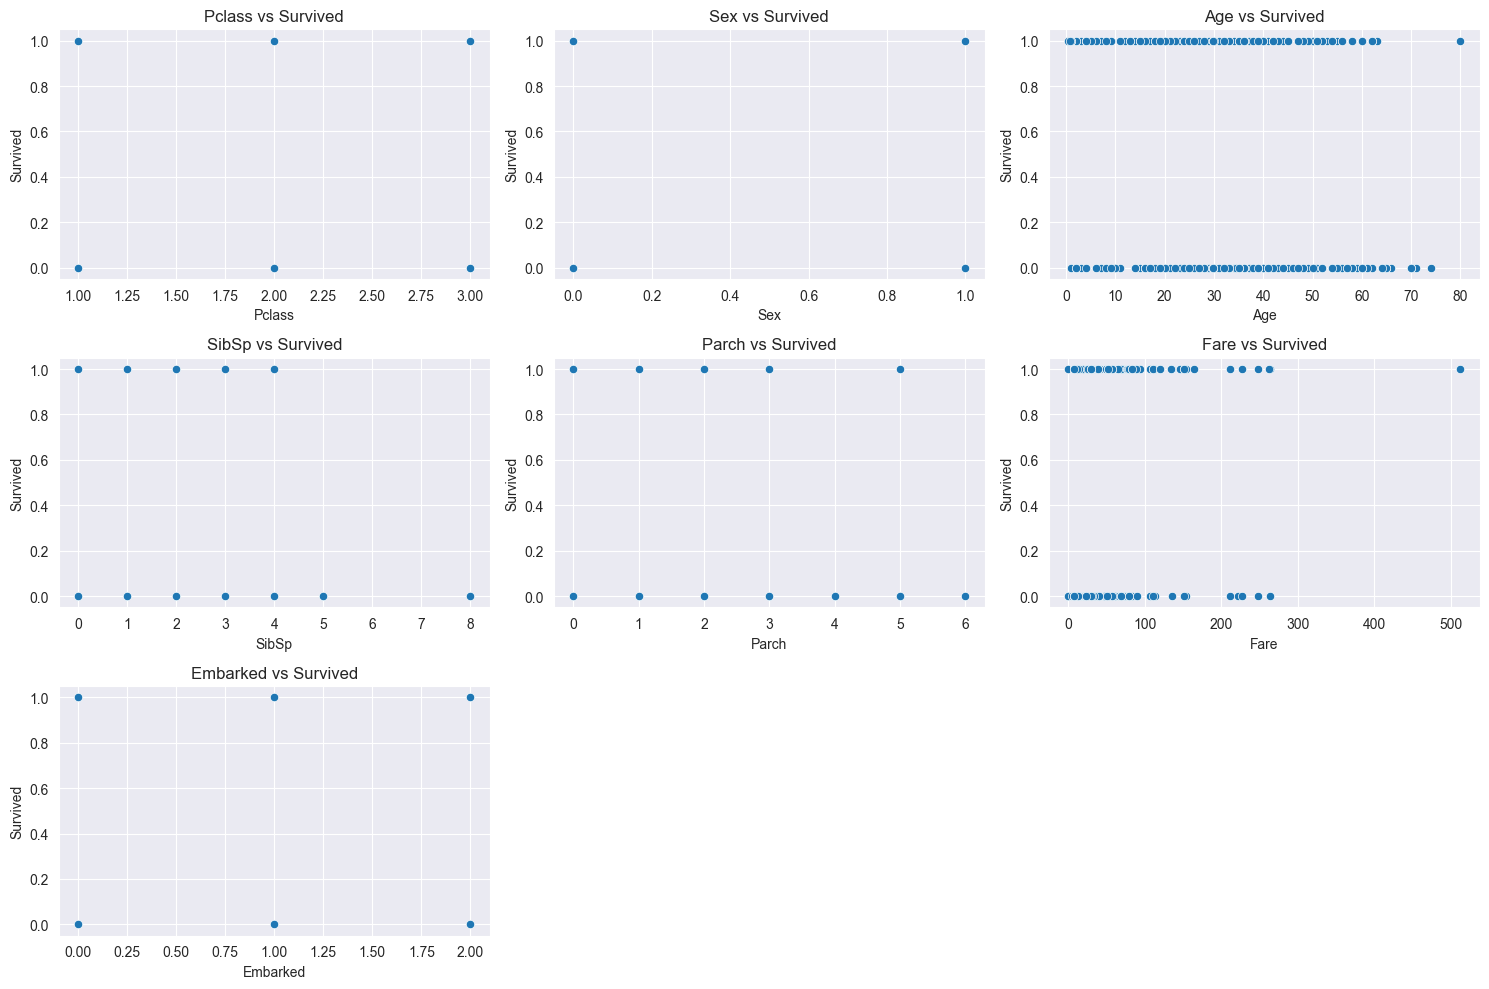

Column 'Survived' has 549 zero(s).
Column 'Sex' has 577 zero(s).
Column 'SibSp' has 608 zero(s).
Column 'Parch' has 678 zero(s).
Column 'Fare' has 15 zero(s).
Column 'Embarked' has 168 zero(s).
Total number of zeros: 2595


In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Making the NaN with age the mediang
df["Age"] = df["Age"].fillna(df["Age"].mean())

# Doing the same with Embarked but where it is empty
if df["Embarked"].mode().empty:
    default_embarked = "S"
else:
    default_embarked = df["Embarked"].mode()[0]

df["Embarked"] = df["Embarked"].fillna(default_embarked)

df["Sex"] = df["Sex"].map({"male": 0, "female": 1})
df["Embarked"] = df["Embarked"].map({"C": 0, "Q": 1, "S": 2})

X = df[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]]
y = df["Survived"]

print(X.isnull().sum())
print(y.isnull().sum())

print(X.head())

plt.figure(figsize=(15, 10))

for i, col in enumerate(X.columns, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(x=df[col], y=df["Survived"])
    plt.xlabel(col)
    plt.ylabel("Survived")
    plt.title(f"{col} vs Survived")

plt.tight_layout()
plt.show()
# Testing the amount of zeros
num = 0
for i in df.columns:
    zero_count = (df[i] == 0).sum()
    if zero_count > 0:
        print(f"Column '{i}' has {zero_count} zero(s).")
        num += zero_count

print(f"Total number of zeros: {num}")

Train en test KNN classifier

KNN Accuracy: 0.7989

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179


Confusion Matrix:
 [[90 15]
 [21 53]]


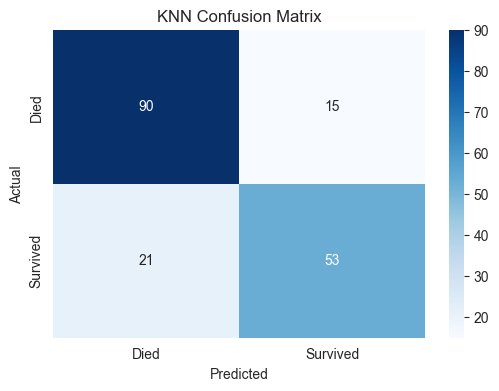

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

X = df[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]]
y = df["Survived"]

# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizing features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Training the KNN classifier with k=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predictions
y_pred = knn.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=["Died", "Survived"], yticklabels=["Died", "Survived"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("KNN Confusion Matrix")
plt.show()


Train en test regressie classifier. Kies je lineair of logistisch?

Answer: I chose for logistic regression because this is a categorical outcome. If it was continuous I would have gone for linear.

Logistic Regression Accuracy: 0.8101

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179


Confusion Matrix:
 [[90 15]
 [19 55]]


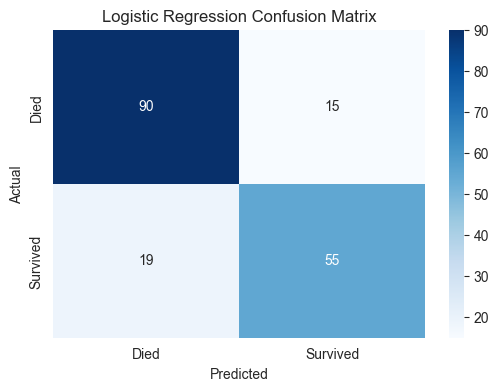

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define features and target again
X = df[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]]
y = df["Survived"]

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features (important for Logistic Regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predictions
y_pred = logreg.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=["Died", "Survived"], yticklabels=["Died", "Survived"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression Confusion Matrix")
plt.show()


Welk model geeft het beste resultaat?

Comparison of KNN vs Logistic Regression:
                 Model  Accuracy
0                  KNN  0.798883
1  Logistic Regression  0.810056


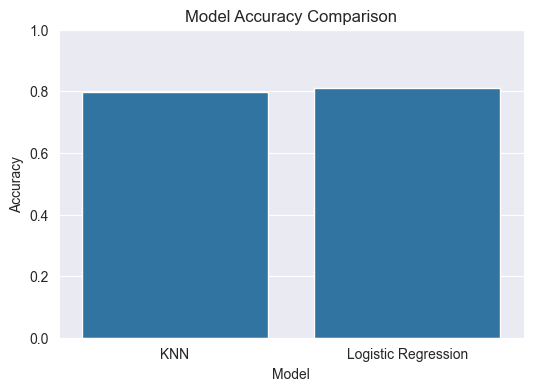

In [32]:
# Stored results in a dictionary
results = {
    "Model": ["KNN", "Logistic Regression"],
    "Accuracy": [accuracy_score(y_test, knn.predict(X_test)), accuracy_score(y_test, logreg.predict(X_test))]
}

results_df = pd.DataFrame(results)

print("Comparison of KNN vs Logistic Regression:")
print(results_df)

# Plot accuracy comparison
plt.figure(figsize=(6, 4))
sns.barplot(x="Model", y="Accuracy", data=results_df)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()


Answer: The logistic regression gave a better result, I'd guess this is because the data is more linearly seperable.

Extra: Kan je het resultaat verbeteren?